## 1. Perkenalan Dataset
#### Saya menggunakan dataset Student Performance dari UCI. Dataset ini berisi fitur demografis/sosial/sekolah siswa dan nilai akademik. Target yang digunakan pada eksperimen ini adalah G3 (nilai akhir).

## 2. Import library

In [6]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
import sys
print(sys.executable)
import sys
!{sys.executable} -m pip install ucimlrepo



c:\Users\sabil\AppData\Local\Programs\Python\Python313\python.exe



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


## 3. Memuat Dataset

In [9]:
from ucimlrepo import fetch_ucirepo

# ambil dataset Student Performance (UCI id=320)
student = fetch_ucirepo(id=320)

X = student.data.features
y = student.data.targets
df = pd.concat([X, y], axis=1)

raw_path = "../namadataset_raw/student_performance_raw.csv"
df.to_csv(raw_path, index=False)

print("RAW saved:", raw_path)
print("Shape:", df.shape)
df.head()


RAW saved: ../namadataset_raw/student_performance_raw.csv
Shape: (649, 33)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [10]:
DATA_PATH = "../namadataset_raw/student_performance_raw.csv"
df = pd.read_csv(DATA_PATH)

df.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


## 4. Exploratory Data Analysis (EDA)

In [11]:
print("Shape:", df.shape)
df.info()

print("\nMissing values (top 15):")
print(df.isna().sum().sort_values(ascending=False).head(15))

print("\nDuplicate rows:", df.duplicated().sum())

print("\nNumeric describe:")
display(df.describe())


Shape: (649, 33)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    objec

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


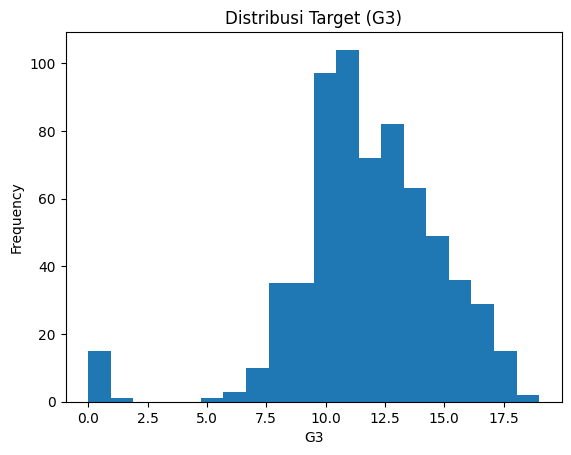

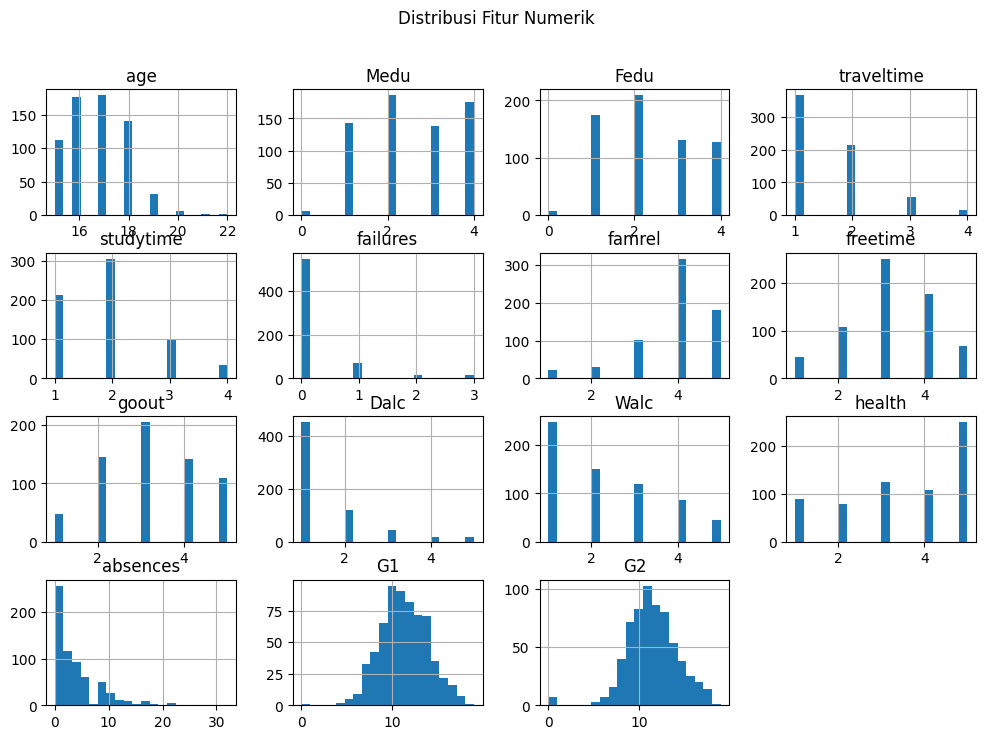

In [18]:
df[TARGET_COL].plot(kind="hist", bins=20)
plt.title("Distribusi Target (G3)")
plt.xlabel("G3")
plt.show()

# Distribusi fitur numerik (tanpa target)
num_cols = df.select_dtypes(include=np.number).columns.tolist()
num_cols = [c for c in num_cols if c != TARGET_COL]

df[num_cols].hist(figsize=(12, 8), bins=20)
plt.suptitle("Distribusi Fitur Numerik")
plt.show()

## 5.Data Preprocessing

In [19]:
TARGET_COL = "G3"

df_clean = df.copy()

# 1) drop duplicates
df_clean = df_clean.drop_duplicates()

# 2) drop fitur yang berpotensi leakage (opsional tapi disarankan)
LEAK_COLS = ["G1", "G2"]
for c in LEAK_COLS:
    if c in df_clean.columns:
        df_clean = df_clean.drop(columns=c)

# 3) pisah X & y
y = df_clean[TARGET_COL]
X = df_clean.drop(columns=[TARGET_COL])

# 4) tipe kolom
num_cols = X.select_dtypes(include=np.number).columns.tolist()
cat_cols = X.select_dtypes(exclude=np.number).columns.tolist()

# 5) missing handling
for c in num_cols:
    X[c] = X[c].fillna(X[c].median())

for c in cat_cols:
    if X[c].isna().sum() > 0:
        X[c] = X[c].fillna(X[c].mode()[0])

print("Total missing setelah handling:", X.isna().sum().sum())

# 6) encoding kategorikal
X_encoded = pd.get_dummies(X, columns=cat_cols, drop_first=True)
print("Shape setelah encoding:", X_encoded.shape)

# 7) scaling numerik
scaler = StandardScaler()
X_scaled = X_encoded.copy()

num_cols_present = [c for c in num_cols if c in X_scaled.columns]
X_scaled[num_cols_present] = scaler.fit_transform(X_scaled[num_cols_present])

# 8) gabungkan + simpan
processed = X_scaled.copy()
processed[TARGET_COL] = y.values

os.makedirs("namadataset_preprocessing", exist_ok=True)
out_path = "namadataset_preprocessing/student_performance_processed.csv"
processed.to_csv(out_path, index=False)

print("Processed saved:", out_path)
processed.head()


Total missing setelah handling: 0
Shape setelah encoding: (649, 39)
Processed saved: namadataset_preprocessing/student_performance_processed.csv


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes,G3
0,1.031695,1.310216,1.540715,0.576718,0.083653,-0.374305,0.072606,-0.171647,0.693785,-0.543555,...,False,True,False,False,False,True,True,False,False,11
1,0.210137,-1.336039,-1.188832,-0.760032,0.083653,-0.374305,1.119748,-0.171647,-0.157380,-0.543555,...,False,False,True,False,False,False,True,True,False,11
2,-1.432980,-1.336039,-1.188832,-0.760032,0.083653,-0.374305,0.072606,-0.171647,-1.008546,0.538553,...,False,True,False,False,False,True,True,True,False,12
3,-1.432980,1.310216,-0.278983,-0.760032,1.290114,-0.374305,-0.974536,-1.123771,-1.008546,-0.543555,...,False,False,True,False,True,True,True,True,True,14
4,-0.611422,0.428131,0.630866,-0.760032,0.083653,-0.374305,0.072606,-0.171647,-1.008546,-0.543555,...,False,False,True,False,False,True,True,False,False,13


In [15]:
df_raw = pd.read_csv("../namadataset_raw/student_performance_raw.csv")
df_raw.columns.tolist()


['school',
 'sex',
 'age',
 'address',
 'famsize',
 'Pstatus',
 'Medu',
 'Fedu',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'traveltime',
 'studytime',
 'failures',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'G1',
 'G2',
 'G3']

In [14]:
print(os.path.exists("../namadataset_raw/student_performance_raw.csv"))
print(os.path.exists("namadataset_preprocessing/student_performance_processed.csv"))

True
True
